In [99]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [100]:
train = pd.read_csv('/Users/jovbrza/Desktop/AI_ML/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/jovbrza/Desktop/AI_ML/house-prices-advanced-regression-techniques/test.csv')

In [101]:
print(len(train.columns))
train.columns

81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [102]:
types = {str(k): list(v) for k, v in train.groupby(train.dtypes, axis=1)}

In [103]:
for key in types.keys():
    print(key, len(types[key]))

int64 35
float64 3
object 43


In [104]:
train_cat = train[types['object']].copy()

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

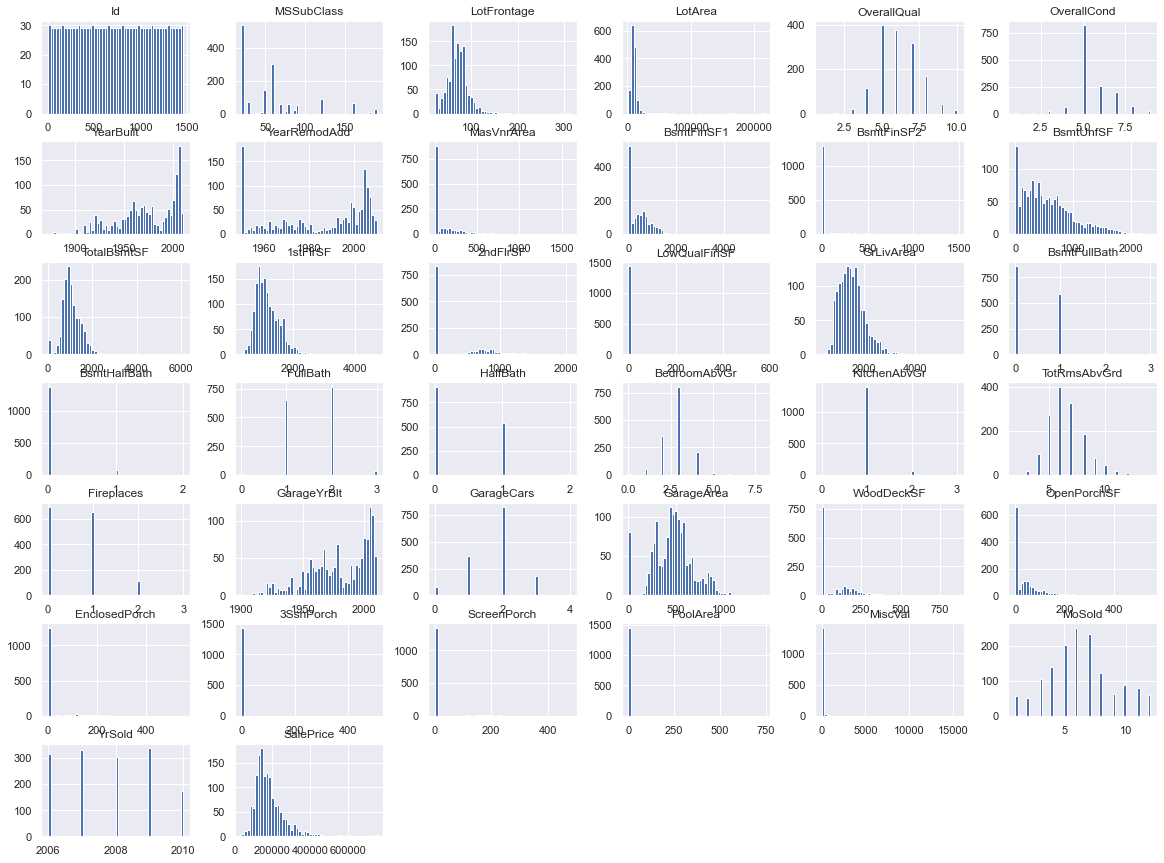

In [105]:
train.hist(bins=50, figsize=(20,15))

In [106]:
(train[train.columns[1:]].corr()['SalePrice'][:].sort_values())[:16]

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
Name: SalePrice, dtype: float64

In [107]:
train = train.drop(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
                   'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch',
                    'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', 'BsmtUnfSF', 'BsmtFullBath', 'GarageYrBlt'], axis=1)

In [108]:
sns.set(rc = {'figure.figsize':(15,8)})
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)

NameError: name 'sn' is not defined

In [109]:
train = train.drop('TotalBsmtSF', axis = 1) # corr with 1stflrsf

In [110]:
train.columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [111]:
(train[types['object']])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [112]:
types = {str(k): list(v) for k, v in train.groupby(train.dtypes, axis=1)}

I want to see how the model does before I go through all the categorical data

In [113]:
train = train.drop(types['object'], axis=1)

In [114]:
train

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,65.0,8450,7,2003,2003,196.0,706,856,854,1710,2,1,8,0,2,548,0,61,208500
1,2,80.0,9600,6,1976,1976,0.0,978,1262,0,1262,2,0,6,1,2,460,298,0,181500
2,3,68.0,11250,7,2001,2002,162.0,486,920,866,1786,2,1,6,1,2,608,0,42,223500
3,4,60.0,9550,7,1915,1970,0.0,216,961,756,1717,1,0,7,1,3,642,0,35,140000
4,5,84.0,14260,8,2000,2000,350.0,655,1145,1053,2198,2,1,9,1,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,1999,2000,0.0,0,953,694,1647,2,1,7,1,2,460,0,40,175000
1456,1457,85.0,13175,6,1978,1988,119.0,790,2073,0,2073,2,0,7,2,2,500,349,0,210000
1457,1458,66.0,9042,7,1941,2006,0.0,275,1188,1152,2340,2,0,9,2,1,252,0,60,266500
1458,1459,68.0,9717,5,1950,1996,0.0,49,1078,0,1078,1,0,5,0,1,240,366,0,142125


<AxesSubplot:>

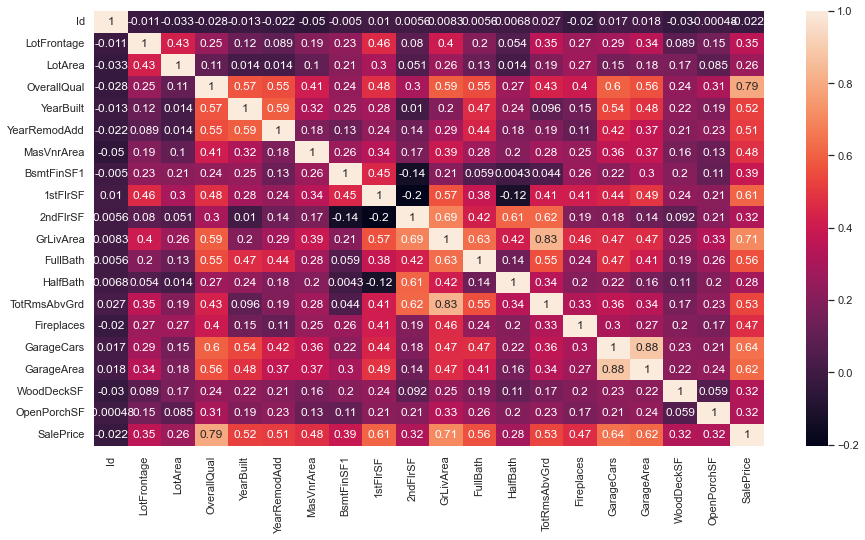

In [115]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
   

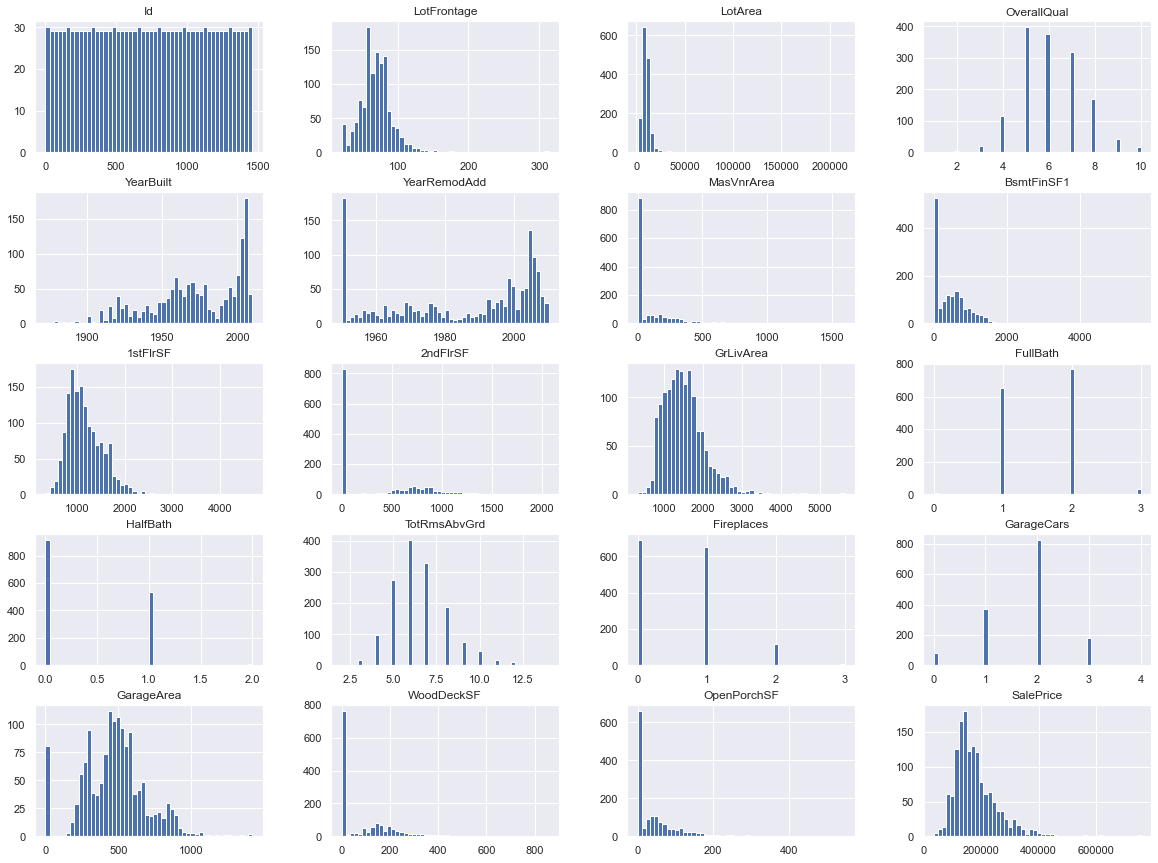

In [116]:
train.hist(bins=50, figsize=(20,15))

In [117]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [118]:
train = train.set_index('Id')

In [119]:
X = train.drop("SalePrice", axis=1)
y = train["SalePrice"].copy()

In [120]:
X_prepared = pipe.fit_transform(X)

In [121]:
X_prepared

array([[-0.22087509, -0.20714171,  0.65147924, ...,  0.35100032,
        -0.75217584,  0.21650316],
       [ 0.46031974, -0.09188637, -0.07183611, ..., -0.06073101,
         1.62619479, -0.70448325],
       [-0.08463612,  0.07347998,  0.65147924, ...,  0.63172623,
        -0.75217584, -0.07036146],
       ...,
       [-0.1754621 , -0.14781027,  0.65147924, ..., -1.03391416,
        -0.75217584,  0.20140502],
       [-0.08463612, -0.08016039, -0.79515147, ..., -1.09005935,
         2.16891024, -0.70448325],
       [ 0.23325479, -0.05811155, -0.79515147, ..., -0.9216238 ,
         5.12192075,  0.32219013]])

In [122]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Stdev:', scores.std())

In [123]:
rf = RandomForestRegressor()
rf.fit(X_prepared, y)
rf_predictions = rf.predict(X_prepared)
rf_mse = mean_squared_error(rf_predictions, y)
rf_rmse = np.sqrt(rf_mse)

In [124]:
rf_rmse

11349.127716213485

now to cross-validate and see how it does

In [125]:
scores = cross_val_score(rf, X_prepared, y, 
                         scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [26318.45322343 27292.3179471  23132.25601328 39810.21344892
 32922.00728449 25955.30717275 24698.03293638 25521.41552976
 38581.64182218 27307.28276762]
Mean: 29153.892814592116
Stdev: 5577.580955504026


In [126]:
types = {str(k): list(v) for k, v in test.groupby(test.dtypes, axis=1)}

In [127]:
test = test.drop(types['object'], axis=1)

In [128]:
test = test.drop(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
                   'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch',
                    'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', 'BsmtUnfSF', 'BsmtFullBath', 'GarageYrBlt'], axis=1)

In [129]:
for col in test.columns:
    print(test[col].isna().value_counts())

False    1459
Name: Id, dtype: int64
False    1232
True      227
Name: LotFrontage, dtype: int64
False    1459
Name: LotArea, dtype: int64
False    1459
Name: OverallQual, dtype: int64
False    1459
Name: YearBuilt, dtype: int64
False    1459
Name: YearRemodAdd, dtype: int64
False    1444
True       15
Name: MasVnrArea, dtype: int64
False    1458
True        1
Name: BsmtFinSF1, dtype: int64
False    1458
True        1
Name: TotalBsmtSF, dtype: int64
False    1459
Name: 1stFlrSF, dtype: int64
False    1459
Name: 2ndFlrSF, dtype: int64
False    1459
Name: GrLivArea, dtype: int64
False    1459
Name: FullBath, dtype: int64
False    1459
Name: HalfBath, dtype: int64
False    1459
Name: TotRmsAbvGrd, dtype: int64
False    1459
Name: Fireplaces, dtype: int64
False    1458
True        1
Name: GarageCars, dtype: int64
False    1458
True        1
Name: GarageArea, dtype: int64
False    1459
Name: WoodDeckSF, dtype: int64
False    1459
Name: OpenPorchSF, dtype: int64


In [143]:
set(test.columns)-set(X.columns)

set()

In [144]:
test = test.set_index('Id')

KeyError: "None of ['Id'] are in the columns"

In [145]:
test = test.drop('TotalBsmtSF',axis=1)

KeyError: "['TotalBsmtSF'] not found in axis"

In [147]:
# stick it in the pipeline:
test_prepared = pipe.fit_transform(test)

In [148]:
submissions = rf.predict(test_prepared)

In [157]:
submissions = pd.Series(submissions)

In [159]:
submissions.set_index(Id)

AttributeError: 'Series' object has no attribute 'set_index'

In [154]:
Id = list(test.index.copy())

In [155]:
Id

[1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1489,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1599,
 1600,
 1601,
 1602,
 1603,

In [160]:
output = pd.DataFrame({'Id': Id, 'SalePrice': submissions})

In [161]:
output

,Id,SalePrice
0,1461,125348.40
1,1462,163331.50
2,1463,187769.67
3,1464,182241.00
4,1465,191632.80
...,...,...
1454,2915,81434.00
1455,2916,87160.00
1456,2917,167117.29
1457,2918,117465.50


In [162]:
output.to_csv('Home_Prices_Sub.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [163]:
import os
print(os.getcwd())

/Users/jovbrza
